# Load Data, Prep Test df


In [1]:
file_idn = '1DsX8MXyVJg5OWJn3cWkA-Onx-IaBmzNT'
file_id_train_new = '177Zi7jxlZBFRKUeWOpTMOGjLw5JOinks'
file_id_test_new = '1t0BXk5FQuIZ-m98Tp06cZJZBZTNHOLZz'
file_id_dict = '1XyhjzSuZu3-Rego09BGdwznJcuo-4sBk'

!gdown {file_idn} -O novice.xslx
!gdown {file_id_train_new} -O train.xslx
!gdown {file_id_test_new} -O test.xslx
!gdown {file_id_dict} -O dict.xslx     # this block of code should download the relevant files.


Downloading...
From: https://drive.google.com/uc?id=1DsX8MXyVJg5OWJn3cWkA-Onx-IaBmzNT
To: /content/novice.xslx
100% 1.80M/1.80M [00:00<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=177Zi7jxlZBFRKUeWOpTMOGjLw5JOinks
To: /content/train.xslx
100% 35.9M/35.9M [00:01<00:00, 20.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t0BXk5FQuIZ-m98Tp06cZJZBZTNHOLZz
To: /content/test.xslx
100% 2.11M/2.11M [00:00<00:00, 37.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XyhjzSuZu3-Rego09BGdwznJcuo-4sBk
To: /content/dict.xslx
100% 40.9k/40.9k [00:00<00:00, 99.0MB/s]


In [2]:
import pandas as pd

data_dct = pd.read_excel('dict.xslx', index_col=0)
df_train = pd.read_excel('train.xslx')
df_test = pd.read_excel('test.xslx')

In [ ]:
df_train.head()

,Match ID 18Char,Completion Date,Match Support Contact Notes,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,...,Little Contact: Interest Finder - Career,Little Contact: Interest Finder - Personality,Little Contact: Interest Finder - Three Wishes,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length
0,a1v2J0000028pRvQAI,2017-11-30,Question: Activities: Answer: See ms...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
1,a1v2J0000028pRvQAI,2017-10-31,Question: Activities: Answer: See MS...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
2,a1v2J0000028pRvQAI,2017-12-01,Question: Activities: Answer: Match ...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
3,a1v2J0000028pRvQAI,2017-05-29,Question: Activities: Answer: Msc as...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
4,a1v2J0000028pRvQAI,2017-04-30,Question: Activities: Answer: Msc as...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0


In [ ]:
df_train['Match ID 18Char'].nunique()


3275

In [ ]:
# DROP DUPLICATES
# Sort by completion date in descending order to keep the latest
df_sorted = df_train.sort_values(by='Completion Date', ascending=False)

# Drop duplicates, keeping the most recent completion date per match
unique_matches_df = df_sorted.drop_duplicates(subset=['Match ID 18Char'], keep='first')

In [ ]:
unique_matches_df['Match ID 18Char'].nunique()


3275

In [ ]:
unique_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 31857 to 10925
Data columns (total 68 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    3275 non-null   object        
 1   Completion Date                                    3275 non-null   datetime64[ns]
 2   Match Support Contact Notes                        2839 non-null   object        
 3   Stage                                              3275 non-null   object        
 4   Little ID                                          3275 non-null   object        
 5   Big ID                                             3275 non-null   object        
 6   Big County                                         2620 non-null   object        
 7   Big Age                                            3275 non-null   int64         
 8   Big Occupation    

# Feature Engineering


## RFM Length

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# RFM Length
from nltk import word_tokenize

unique_matches_df["Rationale for Match"] = unique_matches_df["Rationale for Match"].astype('str')
unique_matches_df["RFM_tokens"] = unique_matches_df["Rationale for Match"].apply(word_tokenize)
unique_matches_df["RFM_length"] = unique_matches_df["RFM_tokens"].apply(len)

<ipython-input-10-b70c3087909f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_matches_df["Rationale for Match"] = unique_matches_df["Rationale for Match"].astype('str')
<ipython-input-10-b70c3087909f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_matches_df["RFM_tokens"] = unique_matches_df["Rationale for Match"].apply(word_tokenize)
<ipython-input-10-b70c3087909f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

## Sentiment

In [ ]:
emotions = pd.read_csv('/content/average_emotions.csv', index_col=0)

In [ ]:
unique_matches_df = unique_matches_df.join(emotions, on='Match ID 18Char')
unique_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 31857 to 10925
Data columns (total 76 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    3275 non-null   object        
 1   Completion Date                                    3275 non-null   datetime64[ns]
 2   Match Support Contact Notes                        2839 non-null   object        
 3   Stage                                              3275 non-null   object        
 4   Little ID                                          3275 non-null   object        
 5   Big ID                                             3275 non-null   object        
 6   Big County                                         2620 non-null   object        
 7   Big Age                                            3275 non-null   int64         
 8   Big Occupation    

## Distance

In [ ]:
match_dist = pd.read_csv('/content/match_distance_train.csv', index_col=0)
match_dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, a1vUX000001QEl7YAG to a1v2J000002uRc0QAE
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   est_distance  2322 non-null   float64
dtypes: float64(1)
memory usage: 51.2+ KB


In [ ]:
unique_matches_df = unique_matches_df.join(match_dist, on='Match ID 18Char')
unique_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 31857 to 10925
Data columns (total 77 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    3275 non-null   object 
 1   Completion Date                                    3275 non-null   object 
 2   Match Support Contact Notes                        2839 non-null   object 
 3   Stage                                              3275 non-null   object 
 4   Little ID                                          3275 non-null   object 
 5   Big ID                                             3275 non-null   object 
 6   Big County                                         2620 non-null   object 
 7   Big Age                                            3275 non-null   int64  
 8   Big Occupation                                     2950 non-null   object 
 9   Big: Mil

## Cadence Outlier

In [ ]:
cad_out = pd.read_csv('/content/train_outliers.csv', index_col=0)
cad_out.has_outlier.value_counts()

,count
has_outlier,
True,2575
False,700


In [ ]:
unique_matches_df = unique_matches_df.join(cad_out, on='Match ID 18Char')
unique_matches_df.head()

,Match ID 18Char,Completion Date,Match Support Contact Notes,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,...,RFM_tokens,RFM_length,Average Anger,Average Disgust,Average Fear,Average Joy,Average Neutral,Average Sadness,est_distance,has_outlier
31857,a1vUX000001QEl7YAG,2025-02-24,MEC connected with Big on 2/24 @ 10:30a MEC as...,Active,003UX00000BDmRvYAL,003UX00000Br4ti,Wright,39,Facilities/Maintenance,Yes - Retired/Vet,...,"['Distance', ':', '19', 'min', '(', '12.8', 'm...",35,0.005189,0.001313,0.001051,0.774943,0.083983,0.038327,12.8,False
32068,a1v2J000003lyW4QAI,2025-02-24,MEC connected with BB and asked how everything...,Active,0032J00003iCbsOQAS,0032J00003iF0GB,Hennepin,31,Human Services: Non-Profit,No,...,"['1', '.', 'Distance', ':', '13', 'miles', '('...",54,0.008116,0.002815,0.011396,0.390420,0.415088,0.087235,13.0,True
30937,a1vUX000001N2gTYAS,2025-02-24,LS and BS attended the most recent BBBS Match ...,Active,003Ht00003pE1TxIAK,003UX00000CPXrZ,Anoka,30,Human Services: Non-Profit,No,...,"['Distance', ':', '14', 'min', '(', '7.0', 'mi...",208,0.005710,0.000739,0.243868,0.665684,0.031663,0.004217,7.0,False
26669,a1v2J000003NgD3QAK,2025-02-24,BB and LB attended Sports Buddies open gym thi...,Active,0032J00003ekj8zQAA,0032J00003iEQDM,Hennepin,31,Finance,No,...,"['1', '.', 'Distance', ':', '15', 'miles', '('...",62,0.007979,0.002097,0.049881,0.599526,0.205900,0.070622,15.0,True
31229,a1vUX000001K2WZYA0,2025-02-24,BB reached out to MEC and wanted to talk about...,Active,003Ht00003r51TkIAI,003UX00000BkgCV,Hennepin,31,Business: Marketing,No,...,"['1', '.', 'Distance', ':', '3', 'miles', '(',...",61,0.001874,0.000685,0.193167,0.772035,0.010554,0.002974,3.0,True


In [ ]:
unique_matches_df['has_outlier'] = unique_matches_df['has_outlier'].astype('object')


## Extroverted vs Introverted topics

In [ ]:
topics = pd.read_csv('/content/nmf_topics_train.csv', index_col=0)
topics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2204 entries, a1v2J000002uR0JQAU to a1vUX000001JziLYAS
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Topic 1 val        2204 non-null   float64
 1   Topic 2 val        2204 non-null   float64
 2   Topic 1 - Topic 2  2204 non-null   float64
dtypes: float64(3)
memory usage: 68.9+ KB


In [ ]:
topics.rename(columns={
    'Topic 1 val': 'Extroverted val',
    'Topic 2 val': 'Introverted val',
    'Topic 1 - Topic 2': 'Extroverted - Introverted'
}, inplace=True)

In [ ]:
unique_matches_df = unique_matches_df.join(topics, on='Match ID 18Char')
unique_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 31857 to 10925
Data columns (total 81 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    3275 non-null   object 
 1   Completion Date                                    3275 non-null   object 
 2   Match Support Contact Notes                        2839 non-null   object 
 3   Stage                                              3275 non-null   object 
 4   Little ID                                          3275 non-null   object 
 5   Big ID                                             3275 non-null   object 
 6   Big County                                         2620 non-null   object 
 7   Big Age                                            3275 non-null   int64  
 8   Big Occupation                                     2950 non-null   object 
 9   Big: Mil

## Multiple Matches at the same time

In [ ]:
parallel = pd.read_csv('/content/date_overlap_train.csv', index_col=0)
parallel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, a1v2J000002eeJMQAY to a1vUX000001ZICnYAO
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   date_overlap       3265 non-null   int64
 1   date_overlap_bool  3265 non-null   int64
dtypes: int64(2)
memory usage: 76.5+ KB


In [ ]:
parallel.date_overlap_bool.value_counts()

,count
date_overlap_bool,
0,3144
1,121


In [ ]:
unique_matches_df = unique_matches_df.merge(parallel, on='Match ID 18Char', how='left')
unique_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    3275 non-null   object 
 1   Completion Date                                    3275 non-null   object 
 2   Match Support Contact Notes                        2839 non-null   object 
 3   Stage                                              3275 non-null   object 
 4   Little ID                                          3275 non-null   object 
 5   Big ID                                             3275 non-null   object 
 6   Big County                                         2620 non-null   object 
 7   Big Age                                            3275 non-null   int64  
 8   Big Occupation                                     2950 non-null   object 
 9   Big: Mil

In [ ]:
unique_matches_df['date_overlap_bool'] = unique_matches_df['date_overlap_bool'].astype('object')
unique_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 0 to 3274
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    3275 non-null   object 
 1   Completion Date                                    3275 non-null   object 
 2   Match Support Contact Notes                        2839 non-null   object 
 3   Stage                                              3275 non-null   object 
 4   Little ID                                          3275 non-null   object 
 5   Big ID                                             3275 non-null   object 
 6   Big County                                         2620 non-null   object 
 7   Big Age                                            3275 non-null   int64  
 8   Big Occupation                                     2950 non-null   object 
 9   Big: Military

## Save DF / Load Checkpoint


In [ ]:
unique_matches_df.to_csv('unique_matches_df.csv')

In [4]:
import pandas as pd
unique_matches_df = pd.read_csv('/content/final_unique_matches_df.csv', index_col=0)

In [5]:
unique_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 0 to 3274
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    3275 non-null   object 
 1   Completion Date                                    3275 non-null   object 
 2   Match Support Contact Notes                        2839 non-null   object 
 3   Stage                                              3275 non-null   object 
 4   Little ID                                          3275 non-null   object 
 5   Big ID                                             3275 non-null   object 
 6   Big County                                         2620 non-null   object 
 7   Big Age                                            3275 non-null   int64  
 8   Big Occupation                                     2950 non-null   object 
 9   Big: Military

In [6]:
unique_matches_df['has_outlier'] = unique_matches_df['has_outlier'].astype('object')
unique_matches_df['date_overlap_bool'] = unique_matches_df['date_overlap_bool'].astype('object')
unique_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 0 to 3274
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    3275 non-null   object 
 1   Completion Date                                    3275 non-null   object 
 2   Match Support Contact Notes                        2839 non-null   object 
 3   Stage                                              3275 non-null   object 
 4   Little ID                                          3275 non-null   object 
 5   Big ID                                             3275 non-null   object 
 6   Big County                                         2620 non-null   object 
 7   Big Age                                            3275 non-null   int64  
 8   Big Occupation                                     2950 non-null   object 
 9   Big: Military

# Feature Selection and Test Train Split

In [7]:
#splitting data
from sklearn.model_selection import train_test_split

X = unique_matches_df[[
    # Numeric Features
    'Big Age',
    'Big Days Acceptance to Match',
    'Big Days Interview to Acceptance',
    'Big Days Interview to Match',

    #'Little RTBM in Matchforce',
    #'Little Moved to RTBM in MF',
    'Little Mailing Address Census Block Group',
    'Big Home Census Block Group',
    'Big Employer/School Census Block Group',
    'RFM_length',
    'Average Anger',
    'Average Disgust',
    'Average Fear',
    'Average Joy',
    'Average Neutral',
    'Average Sadness',
    'est_distance',
    'Extroverted val',
    'Introverted val',
    'Extroverted - Introverted',
    'date_overlap',


    # Categorical Features (Require Encoding)
    'Big Gender',
    'Big Re-Enroll',
    'Big Race/Ethnicity',
    'Big Occupation',
    'Big: Military',
    'Big Level of Education',
    'Big Languages',
    'Big Car Access',
    'Big Open to Cross-Gender Match',
    'Big Contact: Preferred Communication Type',
    'Big Contact: Former Big/Little',
    'Big Contact: Interest Finder - Sports',
    'Big Contact: Interest Finder - Places To Go',
    'Big Contact: Interest Finder - Hobbies',
    'Big Contact: Interest Finder - Entertainment',
    'Big Contact: Volunteer Availability',
    'Big Contact: Marital Status',
    'Little Contact: Language(s) Spoken',
    'Little Contact: Interest Finder - Sports',
    'Little Contact: Interest Finder - Outdoors',
    'Little Contact: Interest Finder - Arts',
    'Little Contact: Interest Finder - Places To Go',
    'Little Contact: Interest Finder - Hobbies',
    'Little Contact: Interest Finder - Entertainment',
    'Little Contact: Interest Finder - Career',
    'Little Contact: Interest Finder - Personality',
    'Little Contact: Interest Finder - Three Wishes',
    'Little Gender',
    'Little Participant: Race/Ethnicity',
    'has_outlier',
    'date_overlap_bool'
]]

y = unique_matches_df['Match Length'].copy() # in case we modify values in y and don't want to affect original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#extract numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

#extract categorical colums
categorical_columns = X_train.select_dtypes(include=['object']).columns


# Preprocessing Pipeline

In [8]:

#preprocessing pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler


cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", feature_name_combiner=lambda feature, category: f"{feature}={category}" )
  )

default_num_pipeline = make_pipeline(IterativeImputer(),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("cat", cat_pipeline, categorical_columns),
    ("num", default_num_pipeline, numerical_columns)
  ])

preprocessing

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(feature_name_combiner=<function <lambda> at 0x796707b416c0>,
                                                                handle_unknown='ignore'))]),
                                 Index(['Big Gender', 'Big Race/Ethnicity', 'Big Occupation', 'Big: Military',
       'Big Level of Education', 'Big Languages', 'Big Car Access'...
       'Big Days Interview to Acceptance', 'Big Days Interview to Match',
       'Little Mailing Address Census Block Group',
       'Big Home Census Block Group', 'Big Employer/School Census Block Group',
       'RFM_length', 'Average Anger', 'Average Disgust', 'Average Fear',
       'Average Joy', 'Average Neutral', 'Average Sadness', 'est_distance',
       'Extroverted val', 'Introverted val', 'Extroverted - Introverted',
       'date_overlap', 'Big Re-Enroll'],
      dtype='object'))])

In [9]:
preprocessing.fit(X_train)
preprocessing.get_feature_names_out()
#get number of features
len(preprocessing.get_feature_names_out())

611

#PCA (optional)

Number of components to retain ≥90% variance: 40


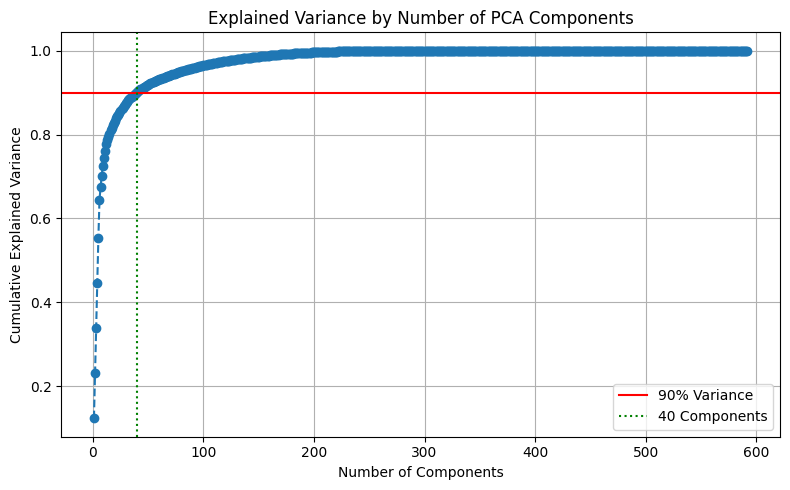

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Transform your training data
X_train_transformed = preprocessing.transform(X_train)
X_dense = X_train_transformed.toarray() if hasattr(X_train_transformed, 'toarray') else X_train_transformed

# Fit PCA without reducing dimensionality first
pca = PCA()
pca.fit(X_dense)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to reach 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain ≥90% variance: {n_components_90}")

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Variance')
plt.axvline(x=n_components_90, color='g', linestyle=':', label=f'{n_components_90} Components')
plt.title('Explained Variance by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Choose the number of components that explain ~90% variance (e.g., 100 as an example)
pca = PCA(n_components=28)
X_train_pca = pca.fit_transform(X_train_transformed.toarray() if hasattr(X_train_transformed, 'toarray') else X_train_transformed)


# Regression Models

In [ ]:
!pip install --upgrade numpy
#!pip install --upgrade catboost

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


## Cross Validation Sanity Check





In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline # import the Pipeline class

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Use 5-fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
results_cv = []

# Define regressors (just preprocessing + model)
regressors = {
    'Null Model (Mean Prediction)': Pipeline([
        ('dummy', DummyRegressor(strategy='mean'))
    ]),
    'Linear Regression': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', Ridge(random_state=42))
    ]),
    'Random Forest Regressor': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'SVR': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', SVR())
    ]),
    'Decision Tree Regressor': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', XGBRegressor(random_state=42))
    ]),
    'LGBM': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LGBMRegressor(random_state=42))
    ])
}

# Evaluate each model with cross-validation
for name, model in regressors.items():
    print(f"Cross-validating: {name}")

    # Scikit-learn uses negative RMSE for scoring — we’ll flip the sign later
    neg_mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    rmse_scores = -neg_mse_scores  # Flip sign to get positive RMSE

    results_cv.append({
        'Model': name,
        'Mean RMSE': round(np.mean(rmse_scores), 4),
        'Std RMSE': round(np.std(rmse_scores), 4)
    })

# Convert results to DataFrame
results_df_cv = pd.DataFrame(results_cv).set_index('Model')

# Show results
print("\nCross-Validation Model Performance (5-Fold RMSE):")
print(results_df_cv)


Cross-validating: Null Model (Mean Prediction)
Cross-validating: Linear Regression
Cross-validating: Ridge Regression
Cross-validating: Random Forest Regressor
Cross-validating: SVR
Cross-validating: Decision Tree Regressor
Cross-validating: XGBoost
Cross-validating: LGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4804
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 115
[LightGBM] [Info] Start training from score 23.353588


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4799
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 116
[LightGBM] [Info] Start training from score 23.357824


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4792
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 114
[LightGBM] [Info] Start training from score 23.320229


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4799
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 113
[LightGBM] [Info] Start training from score 23.339198


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4748
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 118
[LightGBM] [Info] Start training from score 23.548244

Cross-Validation Model Performance (5-Fold RMSE):
                              Mean RMSE  Std RMSE
Model                                            
Null Model (Mean Prediction)    19.6961    0.5135
Linear Regression               16.9323    0.4999
Ridge Regression                16.7284    0.4768
Random Forest Regressor         12.3896    0.3313
SVR                             17.2675    0.5138
Decision Tree Regressor         17.6163    0.5302
XGBoost                         12.8988    0.1815
LGBM                            12.1296    0.3580


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Autopsy

### Evaluate against test - train split

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd


y_train_clean = y_train
y_test_clean = y_test



# Define regressors (just preprocessing + model)
regressors = {
    'Null Model (Mean Prediction)': Pipeline([
        ('dummy', DummyRegressor(strategy='mean'))
    ]),
    'Linear Regression': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', Ridge(random_state=42))
    ]),
    'Random Forest Regressor': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'SVR': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', SVR())
    ]),
    'Decision Tree Regressor': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', XGBRegressor(random_state=42))
    ]),
    'LGBM': Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LGBMRegressor(random_state=42))
    ])
}

# Store test results
results_test = []

# Evaluate each model
for name, model in regressors.items():
    print(f"Training and evaluating on test set: {name}")

    model.fit(X_train, y_train_clean)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test_clean, y_pred))

    results_test.append({
        'Model': name,
        'Test RMSE': round(rmse, 4)
    })

# Create DataFrame
results_df_test = pd.DataFrame(results_test).set_index('Model')

# Show results
print("\nTest Set Model Performance (RMSE) — Without PCA:")
print(results_df_test)


Training and evaluating on test set: Null Model (Mean Prediction)
Training and evaluating on test set: Linear Regression
Training and evaluating on test set: Ridge Regression
Training and evaluating on test set: Random Forest Regressor
Training and evaluating on test set: SVR
Training and evaluating on test set: Decision Tree Regressor
Training and evaluating on test set: XGBoost
Training and evaluating on test set: LGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4789
[LightGBM] [Info] Number of data points in the train set: 2456, number of used features: 113
[LightGBM] [Info] Start training from score 23.106352


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Test Set Model Performance (RMSE) — Without PCA:
                              Test RMSE
Model                                  
Null Model (Mean Prediction)    20.5245
Linear Regression               17.3896
Ridge Regression                17.1964
Random Forest Regressor         12.7859
SVR                             18.2691
Decision Tree Regressor         17.2510
XGBoost                         12.9042
LGBM                            12.3114


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# prompt: get all the hyperparameters of Ridge Regression , XGBoost and LGBM

from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Ridge Regression hyperparameters
ridge_params = RandomForestRegressor().get_params()
print("Random Forest Regression Hyperparameters:")
print(ridge_params)

# XGBoost hyperparameters
xgb_params = XGBRegressor().get_params()
print("\nXGBoost Hyperparameters:")
print(xgb_params)

# LGBM hyperparameters
lgbm_params = LGBMRegressor().get_params()
print("\nLGBM Hyperparameters:")
lgbm_params


Random Forest Regression Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

XGBoost Hyperparameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves'

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

### FEATURE IMPORTANCE!


Training: Random Forest


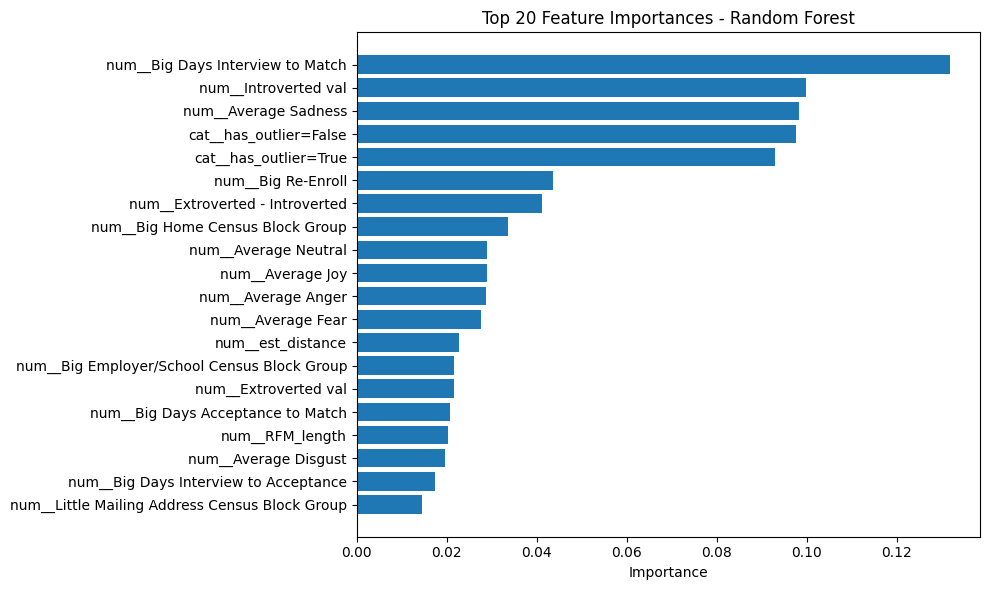


Training: XGBoost


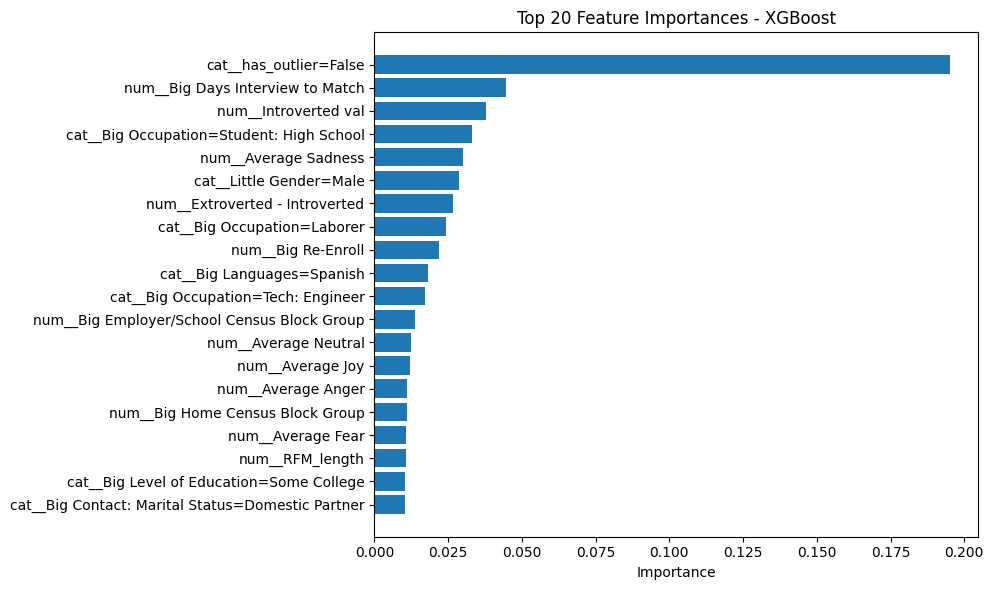


Training: LGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4799
[LightGBM] [Info] Number of data points in the train set: 2456, number of used features: 114
[LightGBM] [Info] Start training from score 23.106352


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


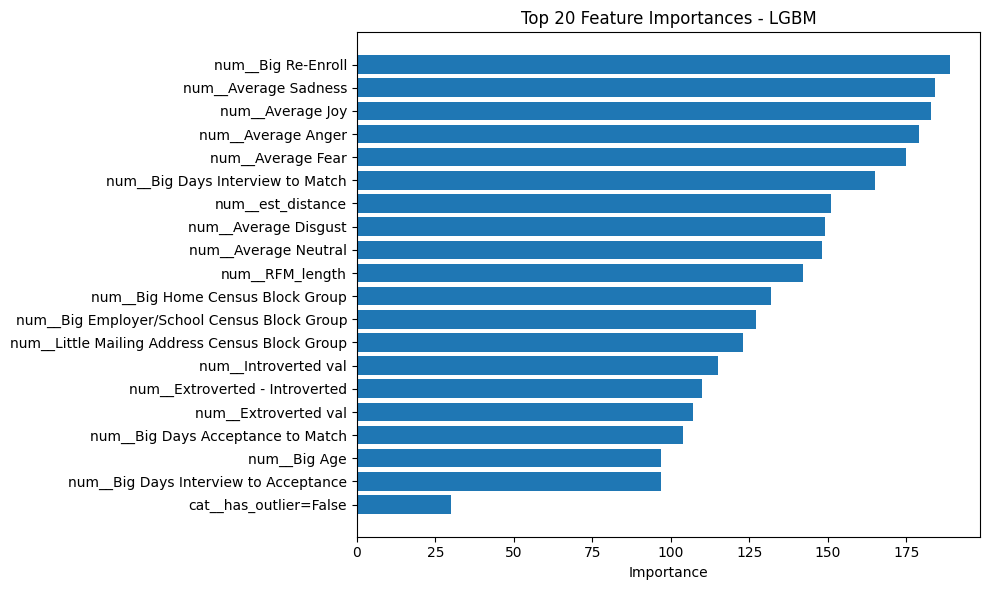

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feature_names = preprocessing.get_feature_names_out()

# Store models and their names
tree_models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LGBM': LGBMRegressor(random_state=42)
}

# Evaluate each model
for name, model in tree_models.items():
    print(f"\nTraining: {name}")
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)

    # Extract trained regressor
    regressor = pipeline.named_steps['regressor']
    importances = regressor.feature_importances_

    # Get top features
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(20)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1])
    plt.title(f"Top 20 Feature Importances - {name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


### Sample Output

In [ ]:
import pandas as pd
import numpy as np

# Fit your best model on full training set
best_model = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', RandomForestRegressor(random_state=42))  # or LGBMRegressor(...)
])
best_model.fit(X_train, y_train)

# Predict on test set
y_pred = best_model.predict(X_test)

# Compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual Match Length': y_test.reset_index(drop=True),
    'Predicted Match Length': np.round(y_pred, 1)
})
comparison_df['Absolute Error'] = np.abs(comparison_df['Actual Match Length'] - comparison_df['Predicted Match Length'])

# Show 10 random examples
print(comparison_df.sample(10))


     Actual Match Length  Predicted Match Length  Absolute Error
491                 16.0                     8.6             7.4
249                 31.6                    27.4             4.2
104                  7.7                    22.1            14.4
115                 22.5                    28.0             5.5
530                  0.5                     4.3             3.8
684                  8.4                     8.1             0.3
281                 55.0                    24.4            30.6
47                   6.9                     8.3             1.4
584                  8.4                     7.2             1.2
303                  7.3                     7.8             0.5


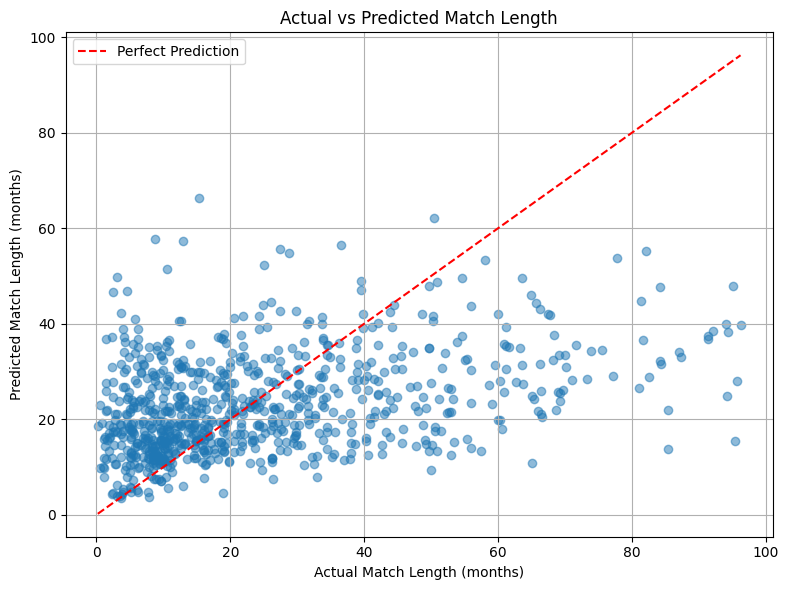

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted Match Length")
plt.xlabel("Actual Match Length (months)")
plt.ylabel("Predicted Match Length (months)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of Match Length')

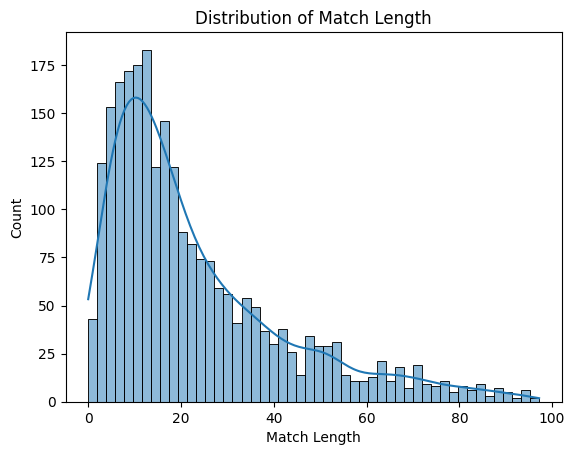

In [ ]:
import seaborn as sns
sns.histplot(y_train, bins=50, kde=True)
plt.title("Distribution of Match Length")


Text(0.5, 1.0, 'Distribution of Match Length')

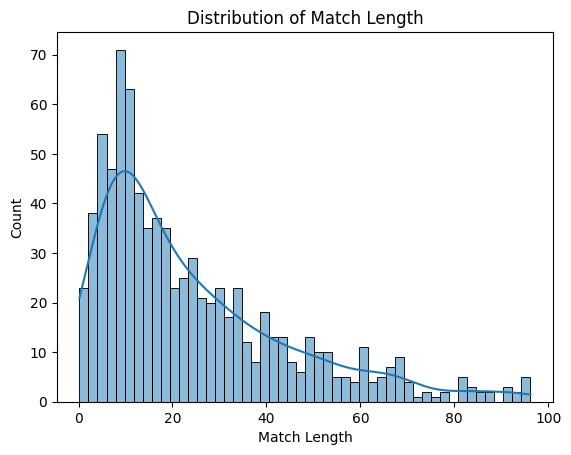

In [ ]:
import seaborn as sns
sns.histplot(y_test, bins=50, kde=True)
plt.title("Distribution of Match Length")


### Quantile Regression

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define quantile level (alpha)
# 0.5 = median prediction, 0.9 = high-end predictions

alpha = 0.6

# Build pipeline with quantile objective
quantile_model = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', LGBMRegressor(objective='quantile', alpha=alpha, random_state=42))
])

# Fit on training data (no log)
quantile_model.fit(X_train, y_train)

# Predict on test data
y_pred_quantile = quantile_model.predict(X_test)

# Evaluate with RMSE
rmse_quantile = np.sqrt(mean_squared_error(y_test, y_pred_quantile))

# Show result
print(f"Quantile Regression (alpha={alpha}) Test RMSE: {rmse_quantile:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4789
[LightGBM] [Info] Number of data points in the train set: 2456, number of used features: 113
[LightGBM] [Info] Start training from score 20.900005
Quantile Regression (alpha=0.6) Test RMSE: 12.4864


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# List of alphas to try
alphas = [0.6]

results_quantile_cv = []

for alpha in alphas:
    print(f"\nEvaluating Quantile Model with alpha = {alpha}")

    model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LGBMRegressor(objective='quantile', alpha=alpha, random_state=42))
    ])

    # RMSE scoring for quantile model (even though it's not its native loss)
    scores = cross_val_score(
        model, X, y,
        scoring='neg_root_mean_squared_error',
        cv=cv,
        n_jobs=-1
    )

    results_quantile_cv.append({
        'Alpha': alpha,
        'Mean RMSE': -np.mean(scores),
        'Std RMSE': np.std(scores)
    })

# Display results
results_df = pd.DataFrame(results_quantile_cv)
print("\nQuantile Regression CV Results:")
print(results_df.sort_values(by='Mean RMSE'))



Evaluating Quantile Model with alpha = 0.6

Quantile Regression CV Results:
   Alpha  Mean RMSE  Std RMSE
0    0.6  12.289178  0.349752


In [ ]:
fine_alphas = np.arange(0.4, 0.75, 0.05)  # 0.4, 0.45, ..., 0.7

results_fine_cv = []

for alpha in fine_alphas:
    print(f"Evaluating Quantile Model with alpha = {alpha:.2f}")

    model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LGBMRegressor(objective='quantile', alpha=alpha, random_state=42))
    ])

    scores = cross_val_score(
        model, X, y,
        scoring='neg_root_mean_squared_error',
        cv=cv,
        n_jobs=-1
    )

    results_fine_cv.append({
        'Alpha': alpha,
        'Mean RMSE': -np.mean(scores),
        'Std RMSE': np.std(scores)
    })

# Show results
results_fine_df = pd.DataFrame(results_fine_cv)
print("\nFine-Tuned Quantile Regression CV Results (0.4–0.7):")
print(results_fine_df.sort_values(by='Mean RMSE'))


Evaluating Quantile Model with alpha = 0.40
Evaluating Quantile Model with alpha = 0.45
Evaluating Quantile Model with alpha = 0.50
Evaluating Quantile Model with alpha = 0.55
Evaluating Quantile Model with alpha = 0.60
Evaluating Quantile Model with alpha = 0.65
Evaluating Quantile Model with alpha = 0.70

Fine-Tuned Quantile Regression CV Results (0.4–0.7):
   Alpha  Mean RMSE  Std RMSE
4   0.60  12.301041  0.191568
3   0.55  12.332969  0.279479
2   0.50  12.400237  0.224027
5   0.65  12.545303  0.352201
6   0.70  12.660176  0.344868
1   0.45  12.821516  0.222484
0   0.40  13.312465  0.316325


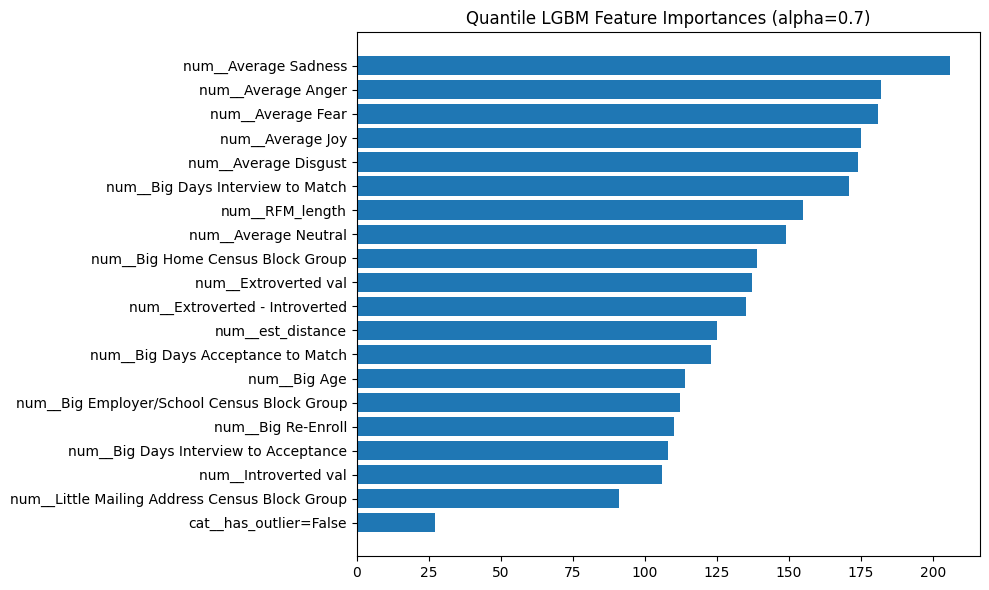

In [ ]:
# Extract regressor from the pipeline
quantile_lgbm = quantile_model.named_steps['regressor']

# Get feature importances
importances = quantile_lgbm.feature_importances_
feature_names = quantile_model.named_steps['preprocessing'].get_feature_names_out()

# Create DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title(f'Quantile LGBM Feature Importances (alpha={quantile_lgbm.alpha})')
plt.tight_layout()
plt.show()


# Hyper Parameter Tuning

Random Forest Regression Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

XGBoost Hyperparameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

LGBM Hyperparameters:
{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np


In [ ]:
rf_pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', RandomForestRegressor(random_state=None))
])

rf_params = {
    'regressor__max_features': np.arange(216,230,4),
    'regressor__n_estimators': [90, 100, 110],
    'regressor__max_depth': [15, 16, 17],
    'regressor__ccp_alpha': [0.0, 0.025]

}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_search = RandomizedSearchCV(
    rf_pipe, rf_params, n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=cv, n_jobs=-1, random_state=42, verbose=1
)

rf_search.fit(X, y)

print("Best RF RMSE:", -rf_search.best_score_)
print("RF Params:", rf_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best RF RMSE: 12.23322028417385
RF Params: {'regressor__n_estimators': 90, 'regressor__max_features': np.int64(224), 'regressor__max_depth': 16, 'regressor__ccp_alpha': 0.025}


In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

from sklearn.metrics import mean_squared_error

def safe_rmse(y_true, y_pred):
    if np.any(np.isnan(y_pred)):
        raise ValueError("❌ NaN detected in predictions")
    return np.sqrt(mean_squared_error(y_true, y_pred))
from sklearn.metrics import make_scorer

safe_rmse_scorer = make_scorer(safe_rmse, greater_is_better=False)





In [ ]:
lgbm_pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', LGBMRegressor(objective='regression', random_state=42))
])

lgbm_params = {
    'regressor__reg_alpha': np.arange(0, 0.5, 0.1),
    'regressor__max_depth': [14, 15, 16],
    'regressor__num_leaves': [18, 20, 22],
    'regressor__n_estimators': [100, 200]

}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
lgbm_search = RandomizedSearchCV(
    lgbm_pipe,
    param_distributions=lgbm_params,
    n_iter=15,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    error_score='raise'  # <-- will raise when NaNs happen
)

lgbm_search.fit(X, y)

print("Best LGBM RMSE:", -lgbm_search.best_score_)
print("LGBM Params:", lgbm_search.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 3275, number of used features: 127
[LightGBM] [Info] Start training from score 23.383817
Best LGBM RMSE: 12.03670563363443
LGBM Params: {'regressor__reg_alpha': np.float64(0.0), 'regressor__num_leaves': 20, 'regressor__n_estimators': 100, 'regressor__max_depth': 15}


In [ ]:
xgb_pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, enable_categorical=True))
])

xgb_params = {
    'regressor__max_depth': [9,10]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_search = RandomizedSearchCV(
    xgb_pipe, xgb_params, n_iter=2,
    scoring='neg_root_mean_squared_error',
    cv=cv, n_jobs=-1, random_state=42, verbose=1
)

xgb_search.fit(X, y)

print("Best XGB RMSE:", -xgb_search.best_score_)
print("XGB Params:", xgb_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best XGB RMSE: 12.565123298800163
XGB Params: {'regressor__max_depth': 9}


In [ ]:
quantile_pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', LGBMRegressor(objective='quantile', alpha=0.6, random_state=42))
])

quantile_params = {
    'regressor__max_depth': [13],
    'regressor__num_leaves': [20, 22, 24],
    'regressor__reg_alpha': [0.0, 0.1, 0.2],
    'regressor__n_estimators': [200, 300]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
quantile_search = RandomizedSearchCV(
    quantile_pipe, quantile_params, n_iter=15,
    scoring='neg_root_mean_squared_error',
    cv=cv, n_jobs=-1, random_state=42, verbose=1
)

quantile_search.fit(X, y)

print("Best Quantile LGBM RMSE:", -quantile_search.best_score_)
print("Quantile LGBM Params:", quantile_search.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 3275, number of used features: 127
[LightGBM] [Info] Start training from score 21.400000
Best Quantile LGBM RMSE: 12.191469934739786
Quantile LGBM Params: {'regressor__reg_alpha': 0.2, 'regressor__num_leaves': 22, 'regressor__n_estimators': 200, 'regressor__max_depth': 13}


In [ ]:
lgbm_search.fit(X, y)
rf_search.fit(X, y)
xgb_search.fit(X, y)
quantile_search.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


ValueError: Invalid parameter 'reg_lambda' for estimator RandomForestRegressor(random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
print("Best LGBM RMSE:", -lgbm_search.best_score_)
print("Best RF RMSE:", -rf_search.best_score_)
print("Best XGB RMSE:", -xgb_search.best_score_)
print("Best Quantile LGBM RMSE:", -quantile_search.best_score_)

print("LGBM Params:", lgbm_search.best_params_)
print("RF Params:", rf_search.best_params_)
print("XGB Params:", xgb_search.best_params_)
print("Quantile LGBM Params:", quantile_search.best_params_)


LGBM Params: {'regressor__reg_lambda': np.float64(0.8), 'regressor__reg_alpha': np.float64(0.1)}


In [ ]:
#get hyperparameters of best regressor

best_lgbm_params = lgbm_search.best_params_
best_lgbm_params


{'regressor__n_estimators': np.int64(30)}

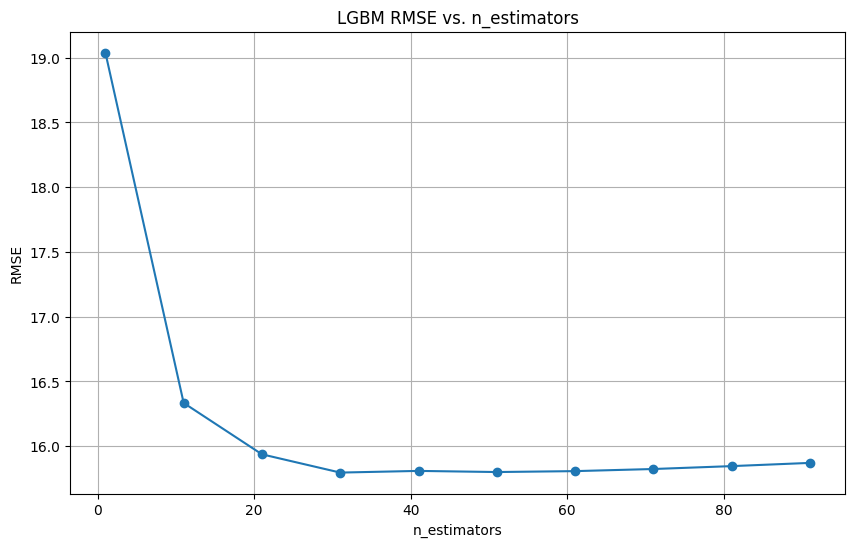

KeyError: 'param_regressor__max_depth'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# prompt: #plot the lgbm features and RMSE scre

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'lgbm_search' is your fitted RandomizedSearchCV object for LGBM
# and 'feature_names' is the list of feature names from your preprocessing pipeline

# Extract feature importances from the best estimator
best_lgbm_model = lgbm_search.best_estimator_
importances = best_lgbm_model.named_steps['regressor'].feature_importances_

# Plot RMSE scores across different hyperparameters
results = pd.DataFrame(lgbm_search.cv_results_)

# Example: Plotting n_estimators vs mean_test_score (RMSE)
plt.figure(figsize=(10, 6))
plt.plot(results['param_regressor__n_estimators'], -results['mean_test_score'], marker='o') # Negated because of neg_root_mean_squared_error
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('LGBM RMSE vs. n_estimators')
plt.grid(True)
plt.show()

#Similarly, plot other hyperparameters
plt.figure(figsize=(10, 6))
plt.plot(results['param_regressor__max_depth'], -results['mean_test_score'], marker='o') # Negated because of neg_root_mean_squared_error
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('LGBM RMSE vs. max_depth')
plt.grid(True)
plt.show()


# Ensembling


## Simple Average

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Set up CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to collect out-of-fold predictions
oof_lgbm = np.zeros(len(X))
oof_xgb = np.zeros(len(X))
oof_rf = np.zeros(len(X))
oof_quantile = np.zeros(len(X))

for train_idx, val_idx in cv.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # LightGBM
    lgbm_model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LGBMRegressor(objective='regression', random_state=42))
    ])
    lgbm_model.fit(X_train_fold, y_train_fold)
    oof_lgbm[val_idx] = lgbm_model.predict(X_val_fold)

    # XGBoost
    xgb_model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
    xgb_model.fit(X_train_fold, y_train_fold)
    oof_xgb[val_idx] = xgb_model.predict(X_val_fold)

    # Random Forest
    rf_model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', RandomForestRegressor(n_jobs=-1, random_state=42))
    ])
    rf_model.fit(X_train_fold, y_train_fold)
    oof_rf[val_idx] = rf_model.predict(X_val_fold)

    # Quantile LightGBM
    quantile_model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LGBMRegressor(objective='quantile', alpha=0.6, random_state=42))
    ])
    quantile_model.fit(X_train_fold, y_train_fold)
    oof_quantile[val_idx] = quantile_model.predict(X_val_fold)

# 🔀 Ensemble: Simple average
oof_ensemble = (oof_lgbm + oof_xgb + oof_rf + oof_quantile) / 4

# 📉 Evaluate
ensemble_rmse = np.sqrt(mean_squared_error(y, oof_ensemble))
print(f"✅ Ensemble CV RMSE (simple average of 4 models): {ensemble_rmse:.4f}")


✅ Ensemble CV RMSE (simple average of 4 models): 12.0037


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Set up CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to collect out-of-fold predictions
oof_lgbm = np.zeros(len(X))
oof_xgb = np.zeros(len(X))
oof_rf = np.zeros(len(X))
oof_quantile = np.zeros(len(X))

for train_idx, val_idx in cv.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # LightGBM with best parameters
    lgbm_model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LGBMRegressor(
            objective='regression',
            random_state=42,
            reg_alpha=np.float64(0.0),
            num_leaves=20,
            n_estimators=100,
            max_depth=15
        ))
    ])
    lgbm_model.fit(X_train_fold, y_train_fold)
    oof_lgbm[val_idx] = lgbm_model.predict(X_val_fold)

    # XGBoost with best parameters
    xgb_model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            max_depth=9
        ))
    ])
    xgb_model.fit(X_train_fold, y_train_fold)
    oof_xgb[val_idx] = xgb_model.predict(X_val_fold)

    # Random Forest with best parameters
    rf_model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', RandomForestRegressor(
            n_jobs=-1,
            random_state=42,
            n_estimators=90,
            max_features=np.int64(224),
            max_depth=16,
            ccp_alpha=0.025
        ))
    ])
    rf_model.fit(X_train_fold, y_train_fold)
    oof_rf[val_idx] = rf_model.predict(X_val_fold)

    # Quantile LightGBM with best parameters
    quantile_model = Pipeline([
        ('preprocessing', preprocessing),
        ('regressor', LGBMRegressor(
            objective='quantile',
            alpha=0.6,
            random_state=42,
            reg_alpha=0.2,
            num_leaves=22,
            n_estimators=200,
            max_depth=13
        ))
    ])
    quantile_model.fit(X_train_fold, y_train_fold)
    oof_quantile[val_idx] = quantile_model.predict(X_val_fold)

# 🔀 Ensemble: Simple average
oof_ensemble = (oof_lgbm + oof_xgb + oof_rf + oof_quantile) / 4

# 📉 Evaluate
ensemble_rmse = np.sqrt(mean_squared_error(y, oof_ensemble))
print(f"✅ Ensemble CV RMSE (simple average of 4 models): {ensemble_rmse:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4804
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 115
[LightGBM] [Info] Start training from score 23.353588


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4804
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 115
[LightGBM] [Info] Start training from score 21.340006


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4799
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 116
[LightGBM] [Info] Start training from score 23.357824


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4799
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 116
[LightGBM] [Info] Start training from score 21.140007


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4792
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 114
[LightGBM] [Info] Start training from score 23.320229


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4792
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 114
[LightGBM] [Info] Start training from score 21.400000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4799
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 113
[LightGBM] [Info] Start training from score 23.339198


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4799
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 113
[LightGBM] [Info] Start training from score 21.600000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4748
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 118
[LightGBM] [Info] Start training from score 23.548244


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4748
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 118
[LightGBM] [Info] Start training from score 21.400000
✅ Ensemble CV RMSE (simple average of 4 models): 11.8518


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Weighted Average

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Store best result
best_rmse = float('inf')
best_weights = None
best_ensemble = None

# Try weights in 0.1 increments that sum to 1
for w1 in np.arange(0, 1.1, 0.01):
    for w2 in np.arange(0, 1.1 - w1, 0.01):
        for w3 in np.arange(0, 1.1 - w1 - w2, 0.01):
            w4 = 1.0 - w1 - w2 - w3
            if w4 < 0 or w4 > 1:
                continue

            # Weighted ensemble prediction
            oof_blend = (
                w1 * oof_lgbm +
                w2 * oof_xgb +
                w3 * oof_rf +
                w4 * oof_quantile
            )

            rmse = np.sqrt(mean_squared_error(y, oof_blend))

            if rmse < best_rmse:
                best_rmse = rmse
                best_weights = (w1, w2, w3, w4)
                best_ensemble = oof_blend

print("✅ Best Weighted Ensemble RMSE:", round(best_rmse, 4))
print("🏆 Best Weights:")
print(f"  LGBM      = {best_weights[0]:.2f}")
print(f"  XGBoost   = {best_weights[1]:.2f}")
print(f"  RandomForest = {best_weights[2]:.2f}")
print(f"  QuantileLGBM = {best_weights[3]:.2f}")


✅ Best Weighted Ensemble RMSE: 11.8352
🏆 Best Weights:
  LGBM      = 0.40
  XGBoost   = 0.22
  RandomForest = 0.13
  QuantileLGBM = 0.25


## Meta Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_stack and y_stack are defined and any necessary preprocessing is available:
# Example: preprocessing = SomePreprocessor()

# Define the pipeline for the meta model (stacker)
stacker_pipe = Pipeline([
    ('preprocessing', preprocessing),  # Uncomment if you have a preprocessing step
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define a parameter grid to search over
stacker_params = {
    'regressor__max_depth': [15, 16, 17]
}

# Set up 5-fold CV for stacker training
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the RandomizedSearchCV object for hyperparameter tuning
stacker_search = RandomizedSearchCV(
    estimator=stacker_pipe,
    param_distributions=stacker_params,
    n_iter=3,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the hyperparameter tuning model on the stacking data
stacker_search.fit(X, y)

# Output the best RMSE and parameters
print("Best Stacker RMSE:", -stacker_search.best_score_)
print("Stacker Params:", stacker_search.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


KeyboardInterrupt: 

    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [15, 16, 17],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]

In [ ]:
stacker = LGBMRegressor(random_state=42)

oof_stack = np.zeros(len(y))  # to store stacker's OOF predictions
# Create new training set for the meta-model (stacking layer)
X_stack = np.vstack([oof_lgbm, oof_xgb, oof_rf, oof_quantile]).T
y_stack = y.values  # target values

for train_idx, val_idx in cv.split(X_stack, y_stack):
    X_train, X_val = X_stack[train_idx], X_stack[val_idx]
    y_train, y_val = y_stack[train_idx], y_stack[val_idx]

    # Train LGBM stacker
    stacker = Ridge(alpha=1.0)
    stacker.fit(X_train, y_train)

    # Predict on validation fold
    oof_stack[val_idx] = stacker.predict(X_val)

# Evaluate stacked model
rmse_stack = np.sqrt(mean_squared_error(y_stack, oof_stack))
print(f"Stacker CV RMSE: {rmse_stack:.4f}")


Stacker CV RMSE: 11.8475


# Test Set Prediction

## Prepare the df


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 63 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    2566 non-null   object        
 1   Completion Date                                    2565 non-null   datetime64[ns]
 2   Match Support Contact Notes                        2466 non-null   object        
 3   Little ID                                          2566 non-null   object        
 4   Big ID                                             2566 non-null   object        
 5   Big County                                         2031 non-null   object        
 6   Big Age                                            2566 non-null   int64         
 7   Big Occupation                                     2224 non-null   object        
 8   Big: Military     

In [ ]:
df_test['Match ID 18Char'].nunique()


300

In [ ]:
# DROP DUPLICATES
# Sort by completion date in descending order to keep the latest
df_test_sorted = df_test.sort_values(by='Completion Date', ascending=False)

# Drop duplicates, keeping the most recent completion date per match
unique_test_matches_df = df_test_sorted.drop_duplicates(subset=['Match ID 18Char'], keep='first')

In [ ]:
unique_test_matches_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 2565 to 49
Data columns (total 63 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    300 non-null    object        
 1   Completion Date                                    300 non-null    datetime64[ns]
 2   Match Support Contact Notes                        282 non-null    object        
 3   Little ID                                          300 non-null    object        
 4   Big ID                                             300 non-null    object        
 5   Big County                                         222 non-null    object        
 6   Big Age                                            300 non-null    int64         
 7   Big Occupation                                     253 non-null    object        
 8   Big: Military          

### Feature Engineering


### RFM Length

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# RFM Length
from nltk import word_tokenize

unique_test_matches_df["Rationale for Match"] = unique_test_matches_df["Rationale for Match"].astype('str')
unique_test_matches_df["RFM_tokens"] = unique_test_matches_df["Rationale for Match"].apply(word_tokenize)
unique_test_matches_df["RFM_length"] = unique_test_matches_df["RFM_tokens"].apply(len)

<ipython-input-68-f594f63b781b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_test_matches_df["Rationale for Match"] = unique_test_matches_df["Rationale for Match"].astype('str')
<ipython-input-68-f594f63b781b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_test_matches_df["RFM_tokens"] = unique_test_matches_df["Rationale for Match"].apply(word_tokenize)
<ipython-input-68-f594f63b781b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [ ]:
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 2565 to 49
Data columns (total 65 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    300 non-null    object        
 1   Completion Date                                    300 non-null    datetime64[ns]
 2   Match Support Contact Notes                        282 non-null    object        
 3   Little ID                                          300 non-null    object        
 4   Big ID                                             300 non-null    object        
 5   Big County                                         222 non-null    object        
 6   Big Age                                            300 non-null    int64         
 7   Big Occupation                                     253 non-null    object        
 8   Big: Military          

### Sentiment

In [ ]:
emotions_test = pd.read_csv('/content/final_test_avg_emotions.csv', index_col=0)

In [ ]:
unique_test_matches_df = unique_test_matches_df.join(emotions_test, on='Match ID 18Char')
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 2565 to 49
Data columns (total 71 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    300 non-null    object        
 1   Completion Date                                    300 non-null    datetime64[ns]
 2   Match Support Contact Notes                        282 non-null    object        
 3   Little ID                                          300 non-null    object        
 4   Big ID                                             300 non-null    object        
 5   Big County                                         222 non-null    object        
 6   Big Age                                            300 non-null    int64         
 7   Big Occupation                                     253 non-null    object        
 8   Big: Military          

### Distance

In [ ]:
match_dist_test = pd.read_csv('/content/match_distance_test.csv', index_col=0)
match_dist_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, a1vUX000000al0PYAQ to a1v2J0000027KoQQAU
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   est_distance  150 non-null    float64
dtypes: float64(1)
memory usage: 4.7+ KB


In [ ]:
unique_test_matches_df = unique_test_matches_df.join(match_dist_test, on='Match ID 18Char')
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 2565 to 49
Data columns (total 72 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    300 non-null    object        
 1   Completion Date                                    300 non-null    datetime64[ns]
 2   Match Support Contact Notes                        282 non-null    object        
 3   Little ID                                          300 non-null    object        
 4   Big ID                                             300 non-null    object        
 5   Big County                                         222 non-null    object        
 6   Big Age                                            300 non-null    int64         
 7   Big Occupation                                     253 non-null    object        
 8   Big: Military          

### Cadence Outlier

In [ ]:
cad_out_test = pd.read_csv('/content/test_outliers.csv', index_col=0)
cad_out_test.has_outlier.value_counts()

,count
has_outlier,
True,210
False,90


In [ ]:
unique_test_matches_df = unique_test_matches_df.join(cad_out_test, on='Match ID 18Char')
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 2565 to 49
Data columns (total 73 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    300 non-null    object        
 1   Completion Date                                    300 non-null    datetime64[ns]
 2   Match Support Contact Notes                        282 non-null    object        
 3   Little ID                                          300 non-null    object        
 4   Big ID                                             300 non-null    object        
 5   Big County                                         222 non-null    object        
 6   Big Age                                            300 non-null    int64         
 7   Big Occupation                                     253 non-null    object        
 8   Big: Military          

In [ ]:
unique_test_matches_df['has_outlier'] = unique_test_matches_df['has_outlier'].astype('object')


### Extroverted vs Introverted topics

In [ ]:
topics_test = pd.read_csv('/content/nmf_topics_test.csv', index_col=0)
topics_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, a1v2J0000027CXKQA2 to a1vUX000000al0PYAQ
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Topic 1 val        273 non-null    float64
 1   Topic 2 val        273 non-null    float64
 2   Topic 1 - Topic 2  273 non-null    float64
dtypes: float64(3)
memory usage: 8.5+ KB


In [ ]:
topics_test.rename(columns={
    'Topic 1 val': 'Extroverted val',
    'Topic 2 val': 'Introverted val',
    'Topic 1 - Topic 2': 'Extroverted - Introverted'
}, inplace=True)

In [ ]:
unique_test_matches_df = unique_test_matches_df.join(topics_test, on='Match ID 18Char')
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 2565 to 49
Data columns (total 76 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    300 non-null    object        
 1   Completion Date                                    300 non-null    datetime64[ns]
 2   Match Support Contact Notes                        282 non-null    object        
 3   Little ID                                          300 non-null    object        
 4   Big ID                                             300 non-null    object        
 5   Big County                                         222 non-null    object        
 6   Big Age                                            300 non-null    int64         
 7   Big Occupation                                     253 non-null    object        
 8   Big: Military          

### Multiple Matches at the same time

In [ ]:
parallel_test = pd.read_csv('/content/date_overlap_test.csv', index_col=0)
parallel_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, a1v2J0000027CXKQA2 to a1vUX000000al0PYAQ
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   date_overlap       300 non-null    int64
 1   date_overlap_bool  300 non-null    int64
dtypes: int64(2)
memory usage: 7.0+ KB


In [ ]:
parallel_test.date_overlap.value_counts()

,count
date_overlap,
0,300


In [ ]:
unique_test_matches_df = unique_test_matches_df.merge(parallel_test, on='Match ID 18Char', how='left')
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    300 non-null    object        
 1   Completion Date                                    300 non-null    datetime64[ns]
 2   Match Support Contact Notes                        282 non-null    object        
 3   Little ID                                          300 non-null    object        
 4   Big ID                                             300 non-null    object        
 5   Big County                                         222 non-null    object        
 6   Big Age                                            300 non-null    int64         
 7   Big Occupation                                     253 non-null    object        
 8   Big: Military       

In [ ]:
unique_test_matches_df['date_overlap_bool'] = unique_test_matches_df['date_overlap_bool'].astype('object')
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    300 non-null    object        
 1   Completion Date                                    300 non-null    datetime64[ns]
 2   Match Support Contact Notes                        282 non-null    object        
 3   Little ID                                          300 non-null    object        
 4   Big ID                                             300 non-null    object        
 5   Big County                                         222 non-null    object        
 6   Big Age                                            300 non-null    int64         
 7   Big Occupation                                     253 non-null    object        
 8   Big: Military       

### Save DF/ Load Checkpoint

In [ ]:
unique_test_matches_df.to_csv('unique_test_matches_df.csv')

In [15]:
unique_test_matches_df = pd.read_csv('/content/unique_test_matches_df (2).csv', index_col=0)
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    300 non-null    object 
 1   Completion Date                                    300 non-null    object 
 2   Match Support Contact Notes                        282 non-null    object 
 3   Little ID                                          300 non-null    object 
 4   Big ID                                             300 non-null    object 
 5   Big County                                         222 non-null    object 
 6   Big Age                                            300 non-null    int64  
 7   Big Occupation                                     253 non-null    object 
 8   Big: Military                                      75 non-null     object 
 9   Big Approved Da

In [16]:
unique_test_matches_df['has_outlier'] = unique_test_matches_df['has_outlier'].astype('object')
unique_test_matches_df['date_overlap_bool'] = unique_test_matches_df['date_overlap_bool'].astype('object')
unique_test_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    300 non-null    object 
 1   Completion Date                                    300 non-null    object 
 2   Match Support Contact Notes                        282 non-null    object 
 3   Little ID                                          300 non-null    object 
 4   Big ID                                             300 non-null    object 
 5   Big County                                         222 non-null    object 
 6   Big Age                                            300 non-null    int64  
 7   Big Occupation                                     253 non-null    object 
 8   Big: Military                                      75 non-null     object 
 9   Big Approved Da

## Feature Selection

In [17]:


test_X = unique_test_matches_df[[
    # Numeric Features
    'Big Age',
    'Big Days Acceptance to Match',
    'Big Days Interview to Acceptance',
    'Big Days Interview to Match',

    #'Little RTBM in Matchforce',
    #'Little Moved to RTBM in MF',
    'Little Mailing Address Census Block Group',
    'Big Home Census Block Group',
    'Big Employer/School Census Block Group',
    'RFM_length',
    'Average Anger',
    'Average Disgust',
    'Average Fear',
    'Average Joy',
    'Average Neutral',
    'Average Sadness',
    'est_distance',
    'Extroverted val',
    'Introverted val',
    'Extroverted - Introverted',
    'date_overlap',


    # Categorical Features (Require Encoding)
    'Big Gender',
    'Big Re-Enroll',
    'Big Race/Ethnicity',
    'Big Occupation',
    'Big: Military',
    'Big Level of Education',
    'Big Languages',
    'Big Car Access',
    'Big Open to Cross-Gender Match',
    'Big Contact: Preferred Communication Type',
    'Big Contact: Former Big/Little',
    'Big Contact: Interest Finder - Sports',
    'Big Contact: Interest Finder - Places To Go',
    'Big Contact: Interest Finder - Hobbies',
    'Big Contact: Interest Finder - Entertainment',
    'Big Contact: Volunteer Availability',
    'Big Contact: Marital Status',
    'Little Contact: Language(s) Spoken',
    'Little Contact: Interest Finder - Sports',
    'Little Contact: Interest Finder - Outdoors',
    'Little Contact: Interest Finder - Arts',
    'Little Contact: Interest Finder - Places To Go',
    'Little Contact: Interest Finder - Hobbies',
    'Little Contact: Interest Finder - Entertainment',
    'Little Contact: Interest Finder - Career',
    'Little Contact: Interest Finder - Personality',
    'Little Contact: Interest Finder - Three Wishes',
    'Little Gender',
    'Little Participant: Race/Ethnicity',
    'has_outlier',
    'date_overlap_bool'
]]


#extract numerical columns
numerical_columns = test_X.select_dtypes(include=['int64', 'float64']).columns

#extract categorical colums
categorical_columns = test_X.select_dtypes(include=['object']).columns


## Best model prediction

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd

# ---- Step 1: Define models ----
model_lgbm = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', LGBMRegressor(objective='regression', random_state=42))
])

model_xgb = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

model_rf = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_quantile = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', LGBMRegressor(objective='quantile', alpha=0.6, random_state=42))
])

# ---- Step 2: Fit models on full training data ----
print("Fitting LGBM...")
model_lgbm.fit(X, y)

print("Fitting XGBoost...")
model_xgb.fit(X, y)

print("Fitting Random Forest...")
model_rf.fit(X, y)

print("Fitting Quantile LGBM...")
model_quantile.fit(X, y)

# ---- Step 3: Predict on test set ----
print("Predicting with all models...")
pred_lgbm = model_lgbm.predict(test_X)
pred_xgb = model_xgb.predict(test_X)
pred_rf = model_rf.predict(test_X)
pred_quantile = model_quantile.predict(test_X)

# ---- Step 4: Weighted average ensemble ----
# #LGBM      = 0.40
#   XGBoost   = 0.22
#   RandomForest = 0.13
#   QuantileLGBM = 0.25
final_preds = (
    0.40 * pred_lgbm +
    0.22 * pred_xgb +
    0.13 * pred_rf +
    0.25 * pred_quantile
)

# ---- Step 5: Save submission ----
submission = pd.DataFrame({
    'id': test_X.index,
    'match length': final_preds
})
submission.to_csv('weighted_ensemble_submission.csv', index=False)

print("✅ Submission saved as 'weighted_ensemble_submission.csv'")


Fitting LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 3275, number of used features: 127
[LightGBM] [Info] Start training from score 23.383817


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fitting XGBoost...
Fitting Random Forest...
Fitting Quantile LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 3275, number of used features: 127
[LightGBM] [Info] Start training from score 21.400000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Predicting with all models...
✅ Submission saved as 'weighted_ensemble_submission.csv'


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [23]:
# ---- Step 5: Format and save final submission ----
submission = pd.DataFrame({
    'RowID': np.arange(1, len(test_X) + 1),
    'MatchID18Char': unique_test_matches_df["Match ID 18Char"],
    'PredictedMatchLength': final_preds,
    'YourTeamID': 'G08'
})

submission.to_csv('Testset_Predictions_Submit.csv', index=False)
print("✅ Final submission saved as 'Testset_Predictions_Submit.csv'")


✅ Final submission saved as 'Testset_Predictions_Submit.csv'


In [ ]:
submission.describe()

,id,match length
count,300.000000,300.000000
mean,149.500000,19.839836
std,86.746758,10.567868
min,0.000000,3.562174
25%,74.750000,9.723600
50%,149.500000,19.853430
75%,224.250000,26.168080
max,299.000000,47.239764


In [19]:
submission.describe()

,id,match length
count,300.000000,300.000000
mean,149.500000,19.539295
std,86.746758,10.816033
min,0.000000,1.187309
25%,74.750000,9.575261
50%,149.500000,19.447611
75%,224.250000,25.693823
max,299.000000,50.816306


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3275 entries, 0 to 3274
Series name: Match Length
Non-Null Count  Dtype  
--------------  -----  
3275 non-null   float64
dtypes: float64(1)
memory usage: 25.7 KB


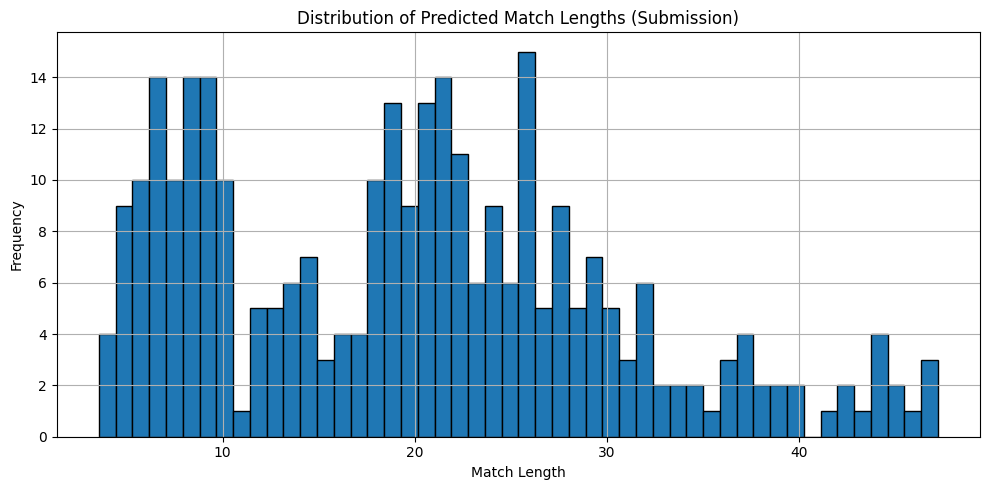

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(submission['match length'], bins=50, edgecolor='black')
plt.title("Distribution of Predicted Match Lengths (Submission)")
plt.xlabel("Match Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


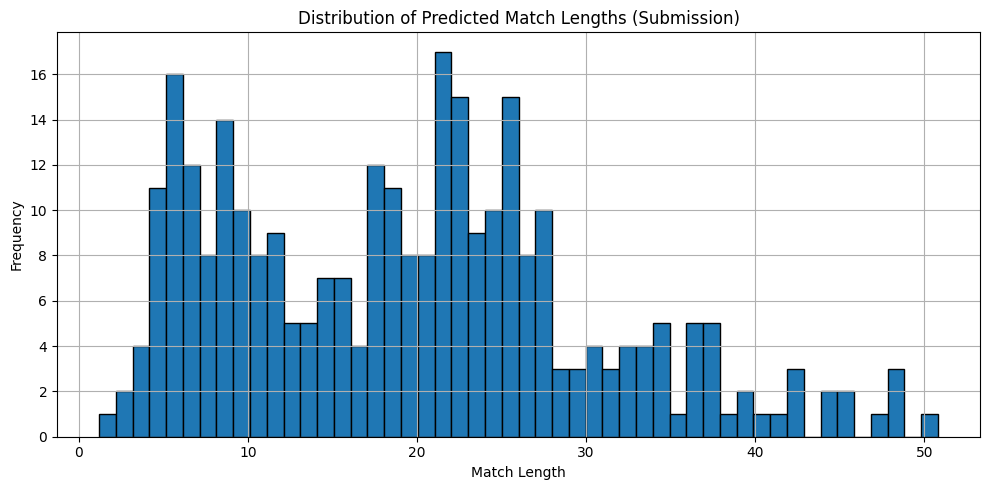

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(submission['match length'], bins=50, edgecolor='black')
plt.title("Distribution of Predicted Match Lengths (Submission)")
plt.xlabel("Match Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


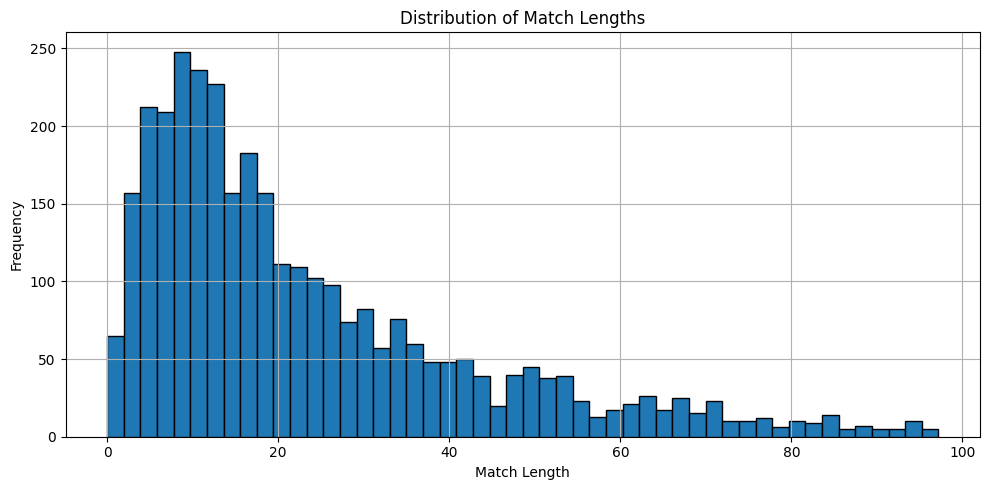

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(y, bins=50, edgecolor='black')
plt.title("Distribution of Match Lengths")
plt.xlabel("Match Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()